In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('G:/Stuff/auto-mpg.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.shape

(398, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


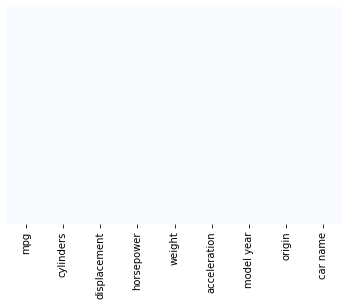

In [6]:
sns.heatmap(df.isna(),cbar=False,cmap='Blues',yticklabels=False)

In [7]:
df.loc[df['horsepower']=='?','horsepower']=105

In [8]:
df["horsepower"]=df["horsepower"].astype(str).astype('int64')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [10]:
df['car name'].value_counts()

ford pinto                   6
toyota corolla               5
amc matador                  5
ford maverick                5
amc gremlin                  4
                            ..
ford ranger                  1
buick century special        1
buick skylark 320            1
amc ambassador sst           1
oldsmobile omega brougham    1
Name: car name, Length: 305, dtype: int64

1: American, 2: European, 3: Japanese


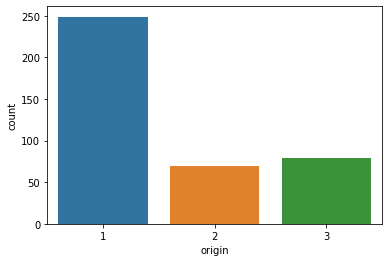

In [11]:
print('1: American, 2: European, 3: Japanese')
sns.countplot(x=df['origin'],data=df)

In [12]:
df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

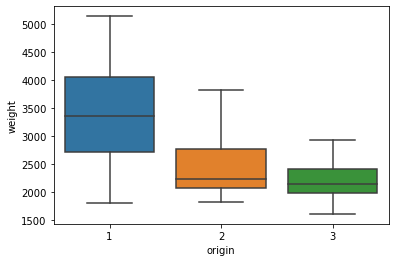

In [13]:
sns.boxplot(x='origin',y='weight',data=df)

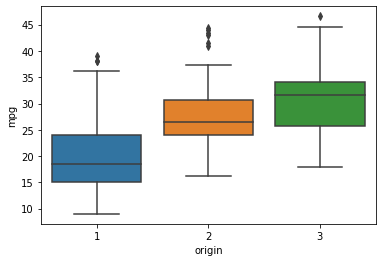

In [14]:
sns.boxplot(x='origin',y='mpg',data=df)

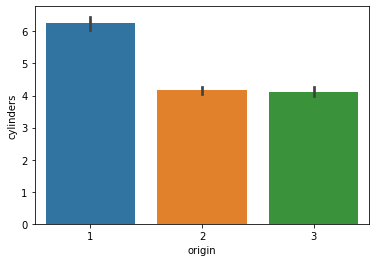

In [15]:
sns.barplot(x='origin',y='cylinders',data=df)

In [26]:
df['model year'].value_counts()

73    40
78    36
76    34
82    31
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28
74    27
Name: model year, dtype: int64

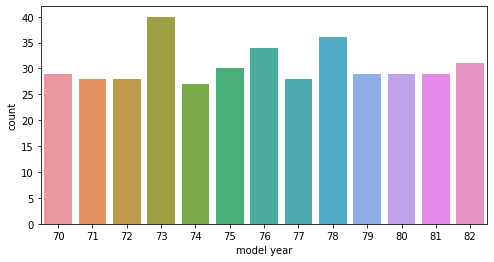

In [33]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['model year'],data=df)

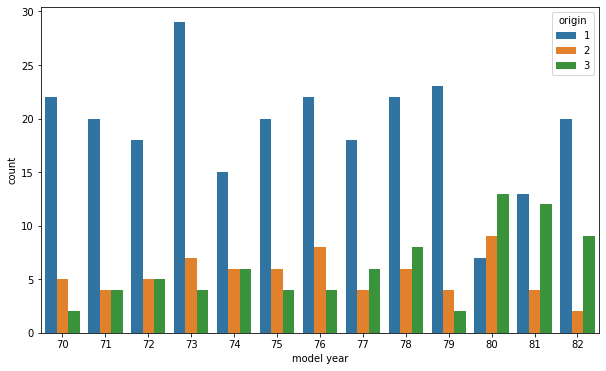

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['model year'],data=df,hue='origin')

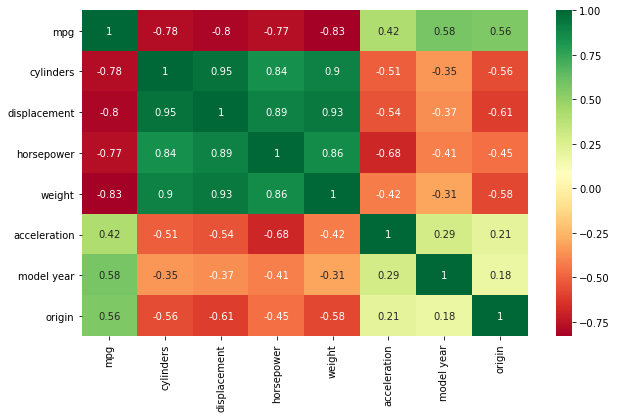

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='RdYlGn',annot=True)

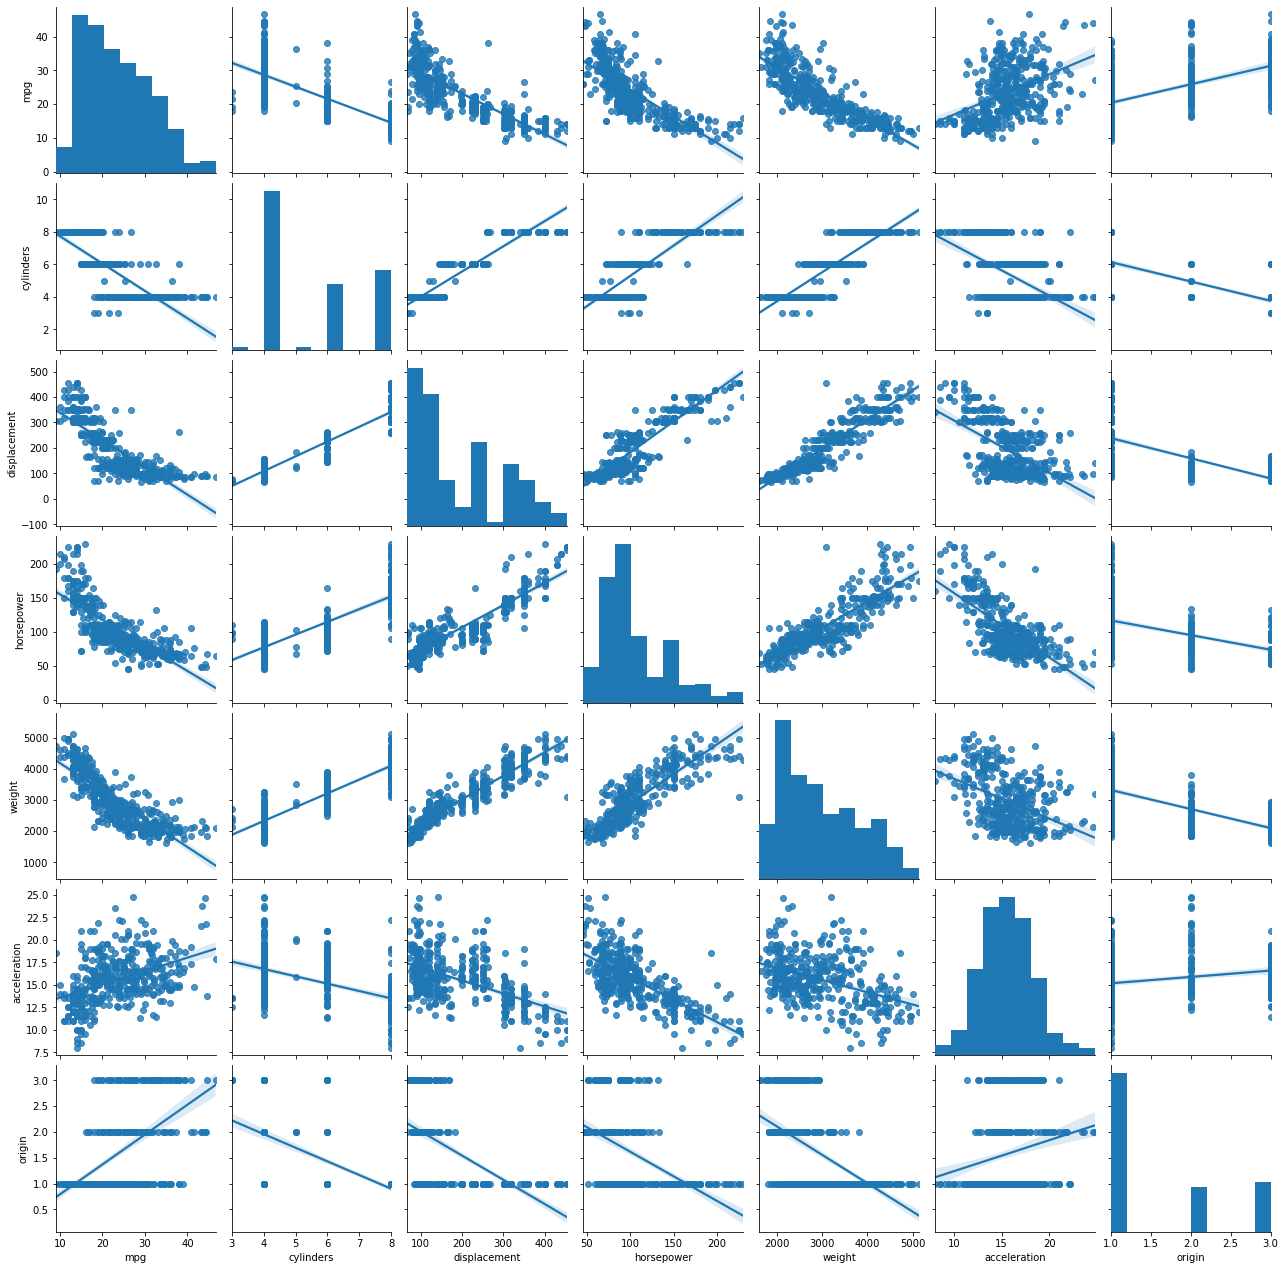

In [19]:
sns.pairplot(df.drop('model year',axis=1),kind='reg')

In [112]:
data=df.drop(['model year','car name','mpg'],axis=1)
target=df['mpg']

In [114]:
data.head()

,cylinders,displacement,horsepower,weight,acceleration,origin
0,8,307.0,130,3504,12.0,1
1,8,350.0,165,3693,11.5,1
2,8,318.0,150,3436,11.0,1
3,8,304.0,150,3433,12.0,1
4,8,302.0,140,3449,10.5,1


In [115]:
data.shape,target.shape

((398, 6), (398,))

In [116]:
from sklearn.model_selection import train_test_split

In [146]:
x_train,x_test,y_train,y_test =train_test_split(data,target,random_state=0,test_size=0.3)

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics

In [148]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
lasso=Lasso(alpha=1)
lasso.fit(x_train,y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [150]:
ridge=Ridge(alpha=1)
ridge.fit(x_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [151]:
RF=RandomForestRegressor()
RF.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [152]:
XGB=XGBRegressor()
XGB.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [153]:
y_pred_LR=LR.predict(x_test)
y_pred_lasso=lasso.predict(x_test)
y_pred_ridge=ridge.predict(x_test)
y_pred_RF=RF.predict(x_test)
y_pred_XGB=XGB.predict(x_test)

### Accuracy for Test data

In [154]:
LR.score(x_test,y_test)*100

70.36501358866202

In [155]:
lasso.score(x_test,y_test)*100

70.10826356235388

In [156]:
ridge.score(x_test,y_test)*100

70.37229137996985

In [157]:
RF.score(x_test,y_test)*100

72.89590483396358

In [158]:
XGB.score(x_test,y_test)*100

68.23324863053882

### Accuracy for Train data

In [159]:
LR.score(x_train,y_train)*100

71.8314493293239

In [160]:
lasso.score(x_train,y_train)*100

70.30481256998681

In [161]:
ridge.score(x_train,y_train)*100

71.83128586561253

In [162]:
RF.score(x_train,y_train)*100

96.71164755784774

In [163]:
XGB.score(x_train,y_train)*100

99.96476573605999

### Mean Square Error.

In [164]:
mse_LR=metrics.mean_squared_error(y_test,y_pred_LR)
mse_LR

18.937314236623866

In [165]:
mse_lasso=metrics.mean_squared_error(y_test,y_pred_lasso)
mse_lasso

19.101382337110604

In [166]:
mse_ridge=metrics.mean_squared_error(y_test,y_pred_ridge)
mse_ridge

18.93266359096363

In [167]:
mse_RF=metrics.mean_squared_error(y_test,y_pred_RF)
mse_RF

17.320027083333343

In [168]:
mse_XGB=metrics.mean_squared_error(y_test,y_pred_XGB)
mse_XGB

20.299552178300708

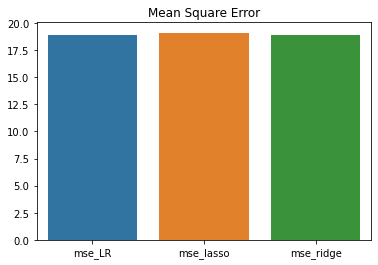

In [169]:
sns.barplot(x=['mse_LR','mse_lasso','mse_ridge'],y=[18.93,19.10,18.93]);
plt.title('Mean Square Error');

In [170]:
from sklearn.externals import joblib

In [171]:
joblib.dump(LR,'G:/Stuff/automobile.pkl')

['G:/Stuff/automobile.pkl']

In [172]:
auto_model =joblib.load('G:/Stuff/automobile.pkl')

In [173]:
auto_model.predict(x_test)

array([14.61605972, 26.57608806, 14.14149534, 25.04769113, 21.57054889,
       33.93609353, 32.08825245, 26.71547976, 17.10930643, 22.46675586,
       29.06321798, 32.0327286 , 24.21883788, 31.18916178, 14.58547558,
       28.47398934, 25.17257429, 24.94248636, 19.54780492, 29.4835452 ,
       11.97773983, 26.3437524 , 27.87792711, 22.98469876, 28.05123248,
       24.14496474, 29.97176531, 26.19361158, 26.14440553, 19.93627593,
       19.52274091, 28.48723663, 23.71035843, 32.15327831, 20.28870658,
       26.84652068, 22.83676419, 13.52408119, 30.31027114,  8.53671375,
       10.4021414 , 15.94053755, 24.94432141, 27.24295497, 27.27978485,
       24.49180937, 23.59796566, 11.41984608, 23.89649118, 30.40792482,
       29.08999048, 28.51636216, 14.60400114, 29.30494183, 16.6757207 ,
        9.85164543, 22.83656141, 23.21872323, 26.23928744, 17.8254827 ,
       22.57421   , 26.13580421, 24.15603791, 23.71247786, 10.84515448,
       12.19195154, 11.57006213, 20.73502058, 25.55343714, 10.62